In [1]:
import pandas as pd
import numpy as np
import pyreadstat
import os

In [2]:
df = pd.read_csv("red_wine_categorical.csv")

In [3]:
df.head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery,freq,c_freq,red,rose,white,sparkling,red_flavor_categories
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2466.0,4856.0,1.0,0.0,0.0,0.0,light and fuity
1,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,13272.0,52329.0,1.0,0.0,0.0,0.0,medium bodied/ balanced
2,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,9472.0,52329.0,1.0,0.0,0.0,0.0,light and fuity
3,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,9472.0,52329.0,1.0,0.0,0.0,0.0,medium bodied/ balanced
4,Argentina,"Baked plum, molasses, balsamic vinegar and che...",Felix,87,30.0,Other,Cafayate,NaN,Michael Schachner,Felix Lavaque 2010 Felix Malbec (Cafayate),Malbec,Felix Lavaque,2652.0,3502.0,1.0,0.0,0.0,0.0,medium bodied/ balanced
5,Argentina,Raw black-cherry aromas are direct and simple ...,Winemaker Selection,87,13.0,Mendoza Province,Mendoza,NaN,Michael Schachner,Gaucho Andino 2011 Winemaker Selection Malbec ...,Malbec,Gaucho Andino,2652.0,3502.0,1.0,0.0,0.0,0.0,full bodied and robust
6,Spain,"Desiccated blackberry, leather, charred wood a...",Vendimia Seleccionada Finca Valdelayegua Singl...,87,28.0,Northern Spain,Ribera del Duero,NaN,Michael Schachner,Pradorey 2010 Vendimia Seleccionada Finca Vald...,Tempranillo Blend,Pradorey,588.0,5014.0,1.0,0.0,0.0,0.0,full bodied and robust
7,US,"Red fruit aromas pervade on the nose, with cig...",NaN,87,32.0,Virginia,Virginia,NaN,Alexander Peartree,Quiévremont 2012 Meritage (Virginia),Meritage,Quiévremont,260.0,52329.0,1.0,0.0,0.0,0.0,medium bodied/ balanced
8,US,Ripe aromas of dark berries mingle with ample ...,Vin de Maison,87,23.0,Virginia,Virginia,NaN,Alexander Peartree,Quiévremont 2012 Vin de Maison Red (Virginia),Red Blend,Quiévremont,8946.0,52329.0,1.0,0.0,0.0,0.0,light and fuity
9,US,"A sleek mix of tart berry, stem and herb, alon...",NaN,87,20.0,Oregon,Oregon,Oregon Other,Paul Gregutt,Acrobat 2013 Pinot Noir (Oregon),Pinot Noir,Acrobat,13272.0,52329.0,1.0,0.0,0.0,0.0,other


In [4]:
df.shape

(68776, 19)

In [5]:
df.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
title                     object
variety                   object
winery                    object
freq                     float64
c_freq                   float64
red                      float64
rose                     float64
white                    float64
sparkling                float64
red_flavor_categories     object
dtype: object

In [6]:
df.country.nunique()

27

In [7]:
# wine_types = []
# white_wines = ['White', 'Chardonnay', 'Riesling', 'Pinot Grigio', 'Pinot Gris', 'Pinot Blanc', 'Blanc', 'Sauvignon Blanc', 'Gewurztraminer', 'Moscato', 'Muscat']
# red_wines = ['Syrah', 'Shiraz', 'Merlot', 'Malbec', 'Cabernet sauvignon', 'Cabernet', 'sauvignon']
# rose_wines = []

# for name in df.variety:
    
#     for white_wine_type in white_wines:

#         if white_wine_type.lower() in str(name).lower():

#             wine_types.append(name)

#         else:
#             wine_types.append('other')

            
            
# #             for red_wine_type in red_wines:
            
            
# #                 if red_wine_type.lower() in str(name).lower():

# #                     wine_types.append(name)

# #                 else:

# #                     wine_types.append('other')


            

        

In [8]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'title', 'variety', 'winery',
       'freq', 'c_freq', 'red', 'rose', 'white', 'sparkling',
       'red_flavor_categories'],
      dtype='object')

In [9]:
feature_df = df[['country','price', 'red', 'rose', 'white', 'sparkling',
       'red_flavor_categories']]

In [10]:
feature_df.columns

Index(['country', 'price', 'red', 'rose', 'white', 'sparkling',
       'red_flavor_categories'],
      dtype='object')

In [11]:
feature_df.head(3)

,country,price,red,rose,white,sparkling,red_flavor_categories
0,Portugal,15.0,1.0,0.0,0.0,0.0,light and fuity
1,US,65.0,1.0,0.0,0.0,0.0,medium bodied/ balanced
2,US,19.0,1.0,0.0,0.0,0.0,light and fuity


In [12]:
# Import dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from xgboost.sklearn import XGBClassifier  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


In [13]:
# Encode the target for the train and test set so it can be fed into our NN and conver to a vector and check it
data = feature_df.copy()

data_binary_encoded = pd.get_dummies(data, columns=["country", "red_flavor_categories"])
data_binary_encoded.head()

,price,red,rose,white,sparkling,country_Argentina,country_Australia,country_Austria,country_Brazil,country_Bulgaria,...,country_Slovenia,country_South Africa,country_Spain,country_Turkey,country_US,country_Uruguay,red_flavor_categories_full bodied and robust,red_flavor_categories_light and fuity,red_flavor_categories_medium bodied/ balanced,red_flavor_categories_other
0,15.0,1.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,65.0,1.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,19.0,1.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,34.0,1.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,30.0,1.0,0.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
data_binary_encoded.dtypes

price                                            float64
red                                              float64
rose                                             float64
white                                            float64
sparkling                                        float64
country_Argentina                                  uint8
country_Australia                                  uint8
country_Austria                                    uint8
country_Brazil                                     uint8
country_Bulgaria                                   uint8
country_Canada                                     uint8
country_Chile                                      uint8
country_England                                    uint8
country_France                                     uint8
country_Germany                                    uint8
country_Greece                                     uint8
country_Hungary                                    uint8
country_Israel                 

In [15]:
len(data_binary_encoded)

68776

In [17]:
final_targets_df = df['points']

final_features_df = data_binary_encoded

In [18]:
print(len(final_targets_df), len(final_features_df))

68776 68776


In [19]:
print(final_targets_df.shape, final_features_df.shape)

(68776,) (68776, 36)


In [20]:
raw_features = final_features_df.values

raw_target = final_targets_df.values

In [21]:
X = raw_features[:, 0:36]

y = raw_target.reshape(-1, 1)

In [22]:
X.shape

(68776, 36)

In [23]:
y.shape

(68776, 1)

In [24]:
# Create the train and test sets for the features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
# Scale the features using the MinMax scaler since we know their values
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = MinMaxScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [26]:
# Create and fit XGB gradient boosting model to start the automated feature selection
from xgboost.sklearn import XGBRegressor

feature_selection_model = XGBRegressor(n_estimators=300, n_jobs=-1,verbose=2)

feature_selection_model.fit(X_train_scaled, y_train_scaled)

[09:06:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbose=2, verbosity=1)

In [27]:
# Run the feature importance function of the XGB Classifier to rank our features
feature_importance = feature_selection_model.feature_importances_

len(feature_importance)

36

In [28]:
feature_importance

array([3.9716142e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 3.5068858e-02, 2.7029863e-02, 2.0288991e-02,
       1.1411998e-02, 1.7913483e-02, 3.1702209e-03, 9.1060074e-03,
       1.9047552e-03, 3.2449666e-02, 7.0620081e-03, 5.7036136e-03,
       5.0564739e-03, 5.4277494e-03, 3.2509238e-02, 1.4065714e-03,
       1.4037801e-02, 2.0119918e-03, 3.8938953e-03, 1.6456741e-03,
       1.4279474e-01, 5.3187199e-03, 2.7063623e-04, 4.5545106e-03,
       1.6173638e-02, 6.0468784e-04, 1.2100588e-01, 4.0284181e-03,
       3.5772494e-03, 4.7297619e-02, 1.7881155e-02, 2.2324447e-03],
      dtype=float32)

In [29]:
# Create a list of the reature names to use below in our charting and check lenghth 
feature_names = final_features_df.columns.tolist()



len(feature_names)

36

In [30]:
# Check list
feature_names

['price',
 'red',
 'rose',
 'white',
 'sparkling',
 'country_Argentina',
 'country_Australia',
 'country_Austria',
 'country_Brazil',
 'country_Bulgaria',
 'country_Canada',
 'country_Chile',
 'country_England',
 'country_France',
 'country_Germany',
 'country_Greece',
 'country_Hungary',
 'country_Israel',
 'country_Italy',
 'country_Lebanon',
 'country_Mexico',
 'country_Moldova',
 'country_Morocco',
 'country_New Zealand',
 'country_Portugal',
 'country_Romania',
 'country_Slovenia',
 'country_South Africa',
 'country_Spain',
 'country_Turkey',
 'country_US',
 'country_Uruguay',
 'red_flavor_categories_full bodied and robust',
 'red_flavor_categories_light and fuity',
 'red_flavor_categories_medium bodied/ balanced',
 'red_flavor_categories_other']

In [31]:
# plt.bar(range(len(feature_selection_model.feature_importances_)), feature_selection_model.feature_importances_)
# plt.show()

In [32]:
# from xgboost import plot_importance


# plot_importance(feature_selection_model)

# plt.show()

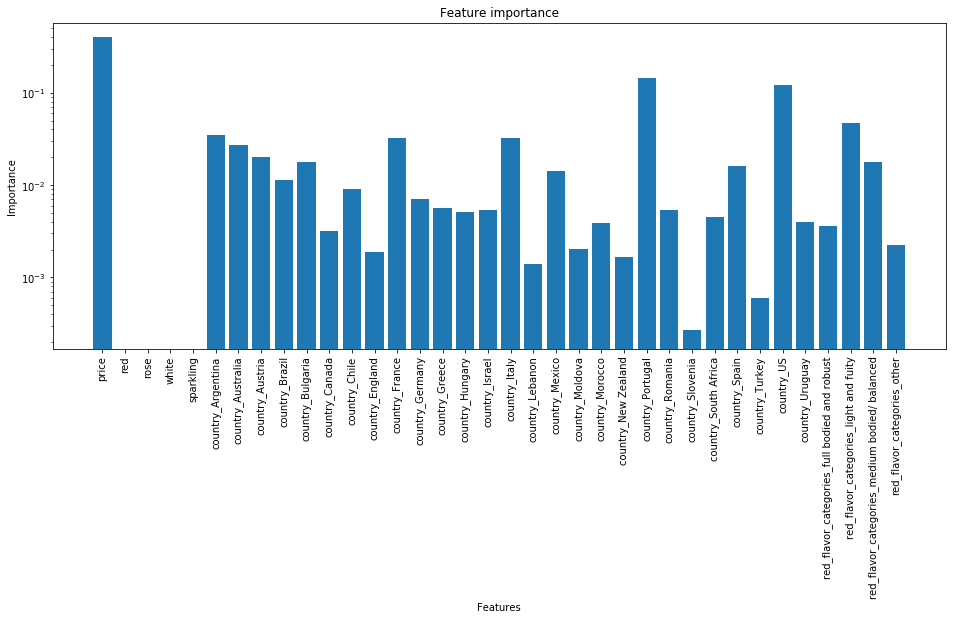

In [33]:
# Plot the figire and inspect the top features
plt.figure(figsize=(16, 6))
plt.yscale('log', nonposy='clip')
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), feature_names, rotation='vertical')
plt.title('Feature importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [35]:
final_features_df.columns

Index(['price', 'red', 'rose', 'white', 'sparkling', 'country_Argentina',
       'country_Australia', 'country_Austria', 'country_Brazil',
       'country_Bulgaria', 'country_Canada', 'country_Chile',
       'country_England', 'country_France', 'country_Germany',
       'country_Greece', 'country_Hungary', 'country_Israel', 'country_Italy',
       'country_Lebanon', 'country_Mexico', 'country_Moldova',
       'country_Morocco', 'country_New Zealand', 'country_Portugal',
       'country_Romania', 'country_Slovenia', 'country_South Africa',
       'country_Spain', 'country_Turkey', 'country_US', 'country_Uruguay',
       'red_flavor_categories_full bodied and robust',
       'red_flavor_categories_light and fuity',
       'red_flavor_categories_medium bodied/ balanced',
       'red_flavor_categories_other'],
      dtype='object')

In [36]:
# Create df for correlation matrix to see which variable are most corrleated to the koi_disposition target
top_features_df = final_features_df[['price', 'country_Portugal', 'country_US', 'red_flavor_categories_light and fuity']]

top_features_df.head()

,price,country_Portugal,country_US,red_flavor_categories_light and fuity
0,15.0,1,0,1
1,65.0,0,1,0
2,19.0,0,1,1
3,34.0,0,1,0
4,30.0,0,0,0


In [38]:
# Create base correlation matrix
corr_matrix = top_features_df.corr()

# Select upper triangle of correlation matrix so that I only cmpare features to other features
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

upper

,price,country_Portugal,country_US,red_flavor_categories_light and fuity
price,NaN,-0.041909,0.029568,-0.072351
country_Portugal,NaN,NaN,-0.217850,0.011987
country_US,NaN,NaN,NaN,-0.033763
red_flavor_categories_light and fuity,NaN,NaN,NaN,NaN


In [39]:
top_features_df.to_csv(r'C:\Users\howar\Desktop\Data Science Boot Camp\Group_Project_3\Group_Project_3\prediction_modeling\output\reduced_wine_features.csv', index=False)

In [40]:
final_targets_df = pd.DataFrame(final_targets_df)

final_targets_df.head()

,points
0,87
1,87
2,87
3,87
4,87


In [41]:
final_targets_df.to_csv(r'C:\Users\howar\Desktop\Data Science Boot Camp\Group_Project_3\Group_Project_3\prediction_modeling\output\reduced_wine_targets.csv', index=False)